### Step 1: Dataset analysis 

Before I start analyzing I would like to get a first look at the data and to make sure that the dataset has no critical problems.

In [1]:
# importing libs that I need
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('/Users/mac/Downloads/Test.csv - test.csv')
pd.set_option('display.max_columns', None)

In [67]:
# base check dataset structure 
df.head()

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,dest_change_number,prediction_price_type,predicted_distance,predicted_duration,change_reason_pricing,ticket_id_new,device_token,rider_app_version,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score
0,22,22,2020-02-02 3:37:31,4.04,10.0,2839,700,1,client,finished,1,upfront,13384.0,1091.0,NaN,1376,NaN,CI.4.17,finished,finished,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0
1,618,618,2020-02-08 2:26:19,6.09,3.6,5698,493,1,client,finished,1,upfront,2286.0,360.0,NaN,2035,NaN,CA.5.43,finished,finished,DA.4.39,1578,Samsung SM-G965F,1,0,NaN
2,657,657,2020-02-08 11:50:35,4.32,3.5,4426,695,1,client,finished,1,upfront,4101.0,433.0,NaN,2222,NaN,CA.5.43,finished,finished,DA.4.37,951,Samsung SM-A530F,1,0,-166.0
3,313,313,2020-02-05 6:34:54,72871.72,NaN,49748,1400,0,client,finished,2,upfront_destination_changed,3017.0,600.0,client_destination_changed,1788,NaN,CA.5.23,finished,finished,DA.4.37,1587,TECNO-Y6,0,1,NaN
4,1176,1176,2020-02-13 17:31:24,20032.50,19500.0,10273,5067,1,client,finished,1,upfront,14236.0,2778.0,NaN,2710,NaN,CA.5.04,finished,finished,DA.4.37,433,Itel W5504,0,0,NaN


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4943 entries, 0 to 4942
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id_new           4943 non-null   int64  
 1   order_try_id_new       4943 non-null   int64  
 2   calc_created           4943 non-null   object 
 3   metered_price          4923 non-null   float64
 4   upfront_price          3409 non-null   float64
 5   distance               4943 non-null   int64  
 6   duration               4943 non-null   int64  
 7   gps_confidence         4943 non-null   int64  
 8   entered_by             4943 non-null   object 
 9   b_state                4943 non-null   object 
 10  dest_change_number     4943 non-null   int64  
 11  prediction_price_type  4923 non-null   object 
 12  predicted_distance     4923 non-null   float64
 13  predicted_duration     4923 non-null   float64
 14  change_reason_pricing  298 non-null    object 
 15  tick

In [5]:
#checking missing data
df.isna().sum()

order_id_new                0
order_try_id_new            0
calc_created                0
metered_price              20
upfront_price            1534
distance                    0
duration                    0
gps_confidence              0
entered_by                  0
b_state                     0
dest_change_number          0
prediction_price_type      20
predicted_distance         20
predicted_duration         20
change_reason_pricing    4645
ticket_id_new               0
device_token             4943
rider_app_version          16
order_state                 0
order_try_state             0
driver_app_version          0
driver_device_uid_new       0
device_name                 0
eu_indicator                0
overpaid_ride_ticket        0
fraud_score              2759
dtype: int64

In [63]:
#checking duplicates
df[(df.duplicated() == True)]

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,dest_change_number,prediction_price_type,predicted_distance,predicted_duration,change_reason_pricing,ticket_id_new,device_token,rider_app_version,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score


In [66]:
#checking general statistics of the dataset
df.describe()

,order_id_new,order_try_id_new,metered_price,upfront_price,distance,duration,gps_confidence,dest_change_number,predicted_distance,predicted_duration,ticket_id_new,device_token,driver_device_uid_new,eu_indicator,overpaid_ride_ticket,fraud_score
count,4943.000000,4943.000000,4923.000000,3409.000000,4943.000000,4943.000000,4943.000000,4943.000000,4923.000000,4923.000000,4943.000000,0.0,4943.000000,4943.000000,4943.000000,2184.000000
mean,2061.074449,2061.074044,7998.471296,4160.095747,9769.223144,1566.230629,0.800728,1.119361,8822.636807,1106.737355,2471.000000,NaN,1093.311349,0.560388,0.068177,-674.046703
std,1199.298429,1199.299081,15815.850352,17015.711912,10912.426401,1650.329858,0.399493,0.499611,10548.801733,806.098535,1427.065521,NaN,626.408069,0.496390,0.252075,1119.189890
min,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,-14225.000000
25%,1020.500000,1020.500000,5.380000,4.200000,3785.500000,604.000000,1.000000,1.000000,4130.500000,597.500000,1235.500000,NaN,561.500000,0.000000,0.000000,-826.500000
50%,2065.000000,2065.000000,13.350000,6.600000,7140.000000,1054.000000,1.000000,1.000000,6918.000000,939.000000,2471.000000,NaN,1088.000000,1.000000,0.000000,-278.500000
75%,3090.500000,3090.500000,10991.670000,4000.000000,11953.000000,1929.500000,1.000000,1.000000,10674.000000,1427.000000,3706.500000,NaN,1643.000000,1.000000,0.000000,-64.750000
max,4165.000000,4165.000000,194483.520000,595000.000000,233190.000000,22402.000000,1.000000,12.000000,353538.000000,20992.000000,4942.000000,NaN,2158.000000,1.000000,1.000000,49.000000


### Step 2: Exploratory data analysis

Generally, I did not see any critical problems with the quality of the dataset. We have a missing data within a few columns - it should be researched. Also, we have no duplicates or sharp changes for most entities in general statistics, it's a good sign. 

But I have seen that the median of upfront_price and metered_price have almost twice the difference. Predicted and actual distance and duration have different mean and median as well. It's a reason to dive deeper in these metrics later in this analysis. 

One more thing that looks strange for me is max for upfront/metred price. It may be related to different currencies (since we have not only the EU region), but in real life I would check it in documentation or colleagues (the ride with a cost of a half million euros looks scary). 

Next, I would like to validate the issue I got in this task.

In [4]:
df2 = df[(df['overpaid_ride_ticket'] == 1)]
print(f"{df2.overpaid_ride_ticket.count() / df.shape[0] * 100: .2f}% rides have overpriced problems.")
df2.head()

 6.82% rides have overpriced problems.


,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,dest_change_number,prediction_price_type,predicted_distance,predicted_duration,change_reason_pricing,ticket_id_new,device_token,rider_app_version,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score
3,313,313,2020-02-05 6:34:54,72871.72,NaN,49748,1400,0,client,finished,2,upfront_destination_changed,3017.0,600.0,client_destination_changed,1788,NaN,CA.5.23,finished,finished,DA.4.37,1587,TECNO-Y6,0,1,NaN
20,201,201,2020-02-03 21:46:30,18929.92,6500.0,14560,1421,0,client,finished,1,upfront,3789.0,538.0,NaN,1621,NaN,CA.4.99,finished,finished,DA.4.10,17,TECNO MOBILE LIMITED TECNO B1p,0,1,NaN
23,1477,1477,2020-02-15 19:41:47,6000.00,10000.0,2478,372,1,client,finished,1,upfront,7381.0,934.0,NaN,2998,NaN,CA.5.44,finished,finished,DA.4.37,267,TECNO CA6S,0,1,NaN
24,1825,1825,2020-02-19 19:05:31,12329.22,NaN,8063,1950,1,client,finished,1,prediction,25317.0,3283.0,NaN,3509,NaN,CI.4.17,finished,finished,DA.4.34,587,Samsung SM-T815Y,0,1,NaN
51,1867,1867,2020-02-20 7:26:49,55192.74,NaN,38311,1819,0,client,finished,1,prediction,7955.0,1305.0,NaN,3562,NaN,CA.5.44,finished,finished,DA.4.14,335,HMD Global Nokia 1,0,1,NaN


**Observations**

We have almost 7% of overpaid rides, which means that almost one of ten riders reported about the problem (especially if we consider that not every rider reports). Definitely not good. 

After I got a first look at the data I decided to check distributions of problem rides by gps confidence and geo (EU/not EU).

In [585]:
df2.groupby(['eu_indicator', 'gps_confidence']).count().order_id_new
print(f"{df2[(df2['eu_indicator'] == 0)].eu_indicator.count() / df2.shape[0] * 100: .2f}% of overprices rides happened not in EU")
print(f"{df2[(df2['gps_confidence'] == 0)].gps_confidence.count() / df2.shape[0] * 100: .2f}% of overprices rides have problem with gps")
print(f"{df[(df['eu_indicator'] == 0)].eu_indicator.count() / df.shape[0] * 100: .2f}% of all rides happened not in EU")
print(f"{df[(df['gps_confidence'] == 0)].gps_confidence.count() / df.shape[0] * 100: .2f}% of all rides have problem with gps")



 96.14% of overprices rides happened not in EU
 59.64% of overprices rides have problem with gps
 43.96% of all rides happened not in EU
 19.93% of all rides have problem with gps


**Observations**

As the result, I found out that more than 95% of the problem rides happened not in the EU and around 60% have problems with gps. 

Also, I would like to check how the problem is distributed by devices and app_version (maybe we released something with a critical bug).

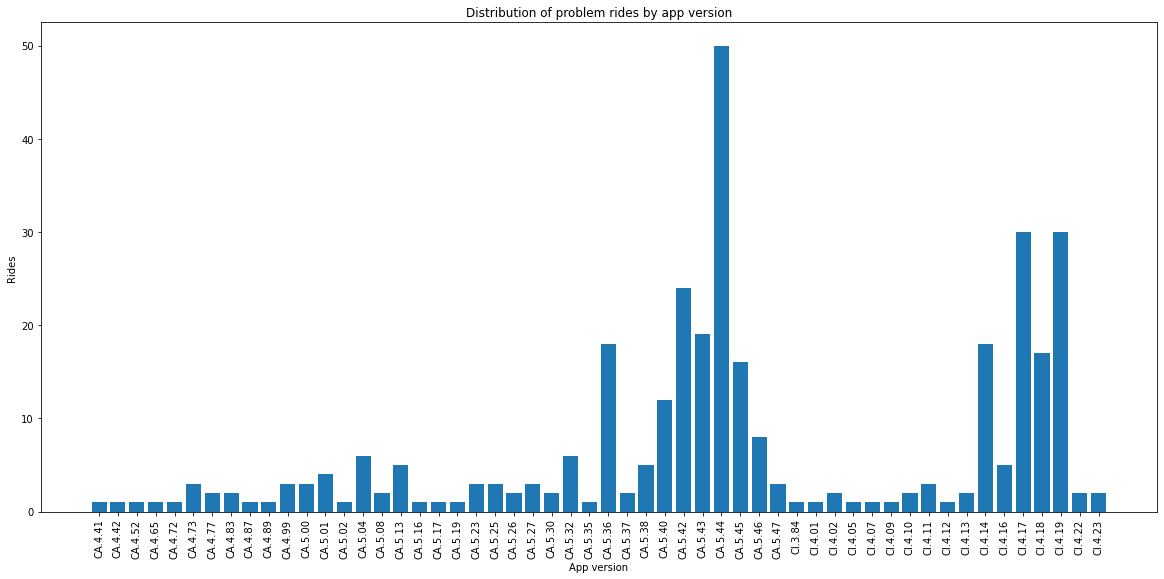

In [524]:
df7 = df2.groupby(['rider_app_version'], as_index=False).count()
x = np.array(df7['rider_app_version'])
y = np.array(df7['order_id_new'])

plt.figure(figsize=(20,9))
plt.xticks(rotation=90)
plt.xlabel("App version")
plt.ylabel("Rides")
plt.title("Distribution of problem rides by app version")
plt.bar(x, y)
plt.show()

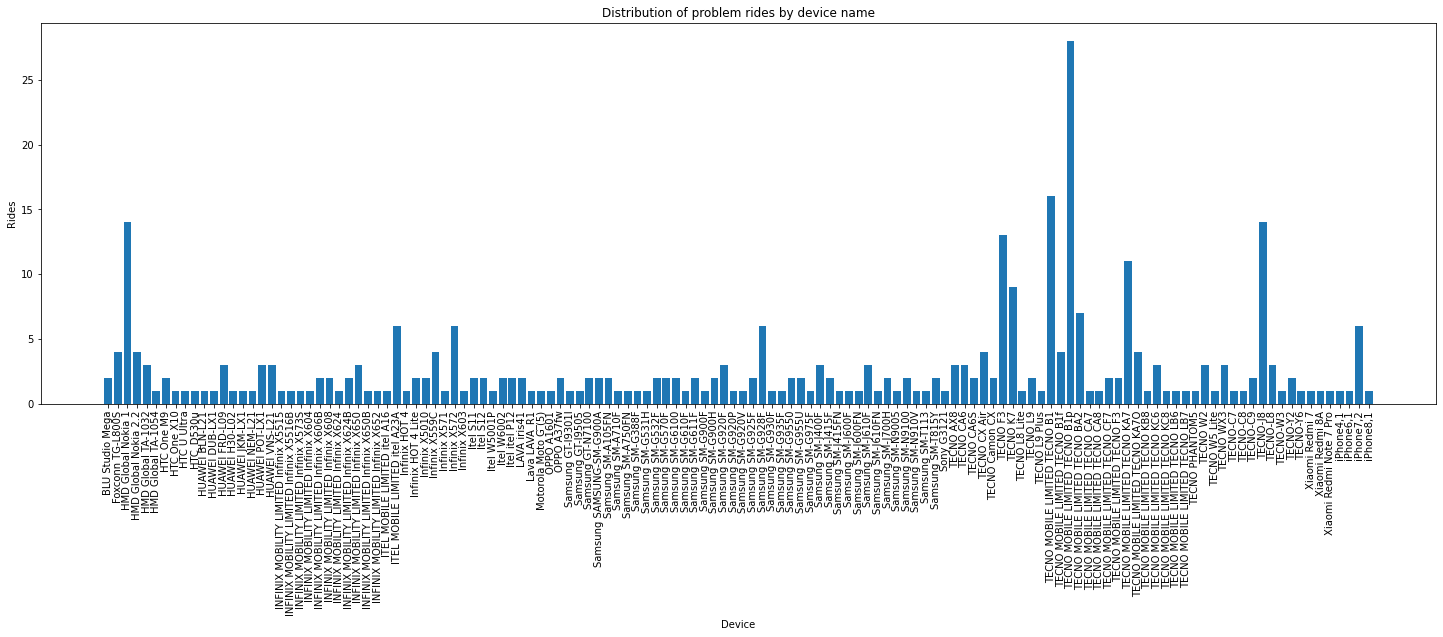

In [526]:
df7 = df2.groupby(['device_name'], as_index=False).count()
x = np.array(df7['device_name'])
y = np.array(df7['order_id_new'])

plt.figure(figsize=(25,7))
plt.xticks(rotation=90)
plt.xlabel("Device")
plt.ylabel("Rides")
plt.title("Distribution of problem rides by device name")
plt.bar(x, y)
plt.show()

**Observations**

There is some splashes on the graph for named "TECHNO" devices and for a few group of app versions (CA.5.37 - CA.5.47 and CI.4.16 - CI.4.19) and probably we should to look at this case in more details, but generally we see that it is a smooth distribution of the problem. 

During the initial check of the dataset I also found out problems with upfront price and I want to dive deeper in this value.

In [550]:
print(str(round((df2["upfront_price"].isnull().sum() / df2.shape[0] * 100), 2)) + '% of overpriced rides have a problem with upfront price')


67.95% of overpriced rides have a problem with upfront price


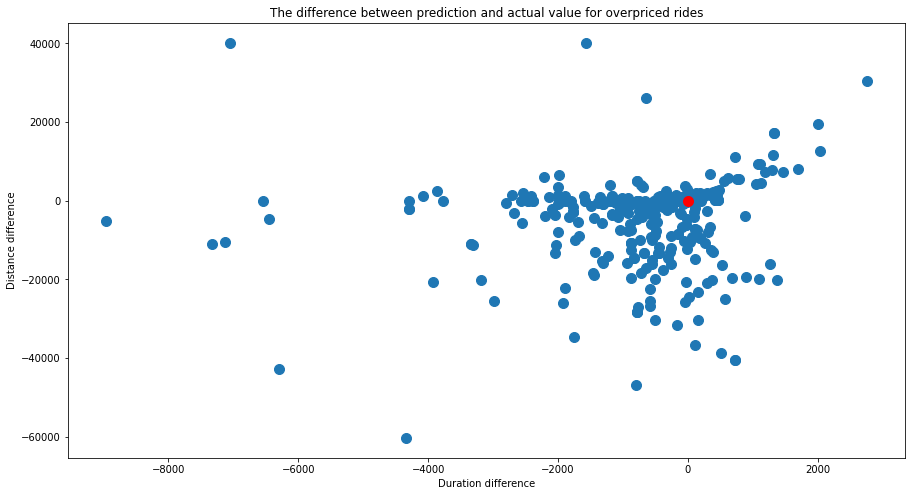

 100.00% of overpriced rides have problems with duration prediction
 89.32% of overpriced rides have problems with distance prediction
 72.11% of overpriced rides obtained final duration more than promised
 59.35% of overpriced rides obtained final distance more than promised


In [552]:
df3 = df2[['metered_price', 'upfront_price', 'distance', 'duration', 'predicted_distance', 'predicted_duration']]
df3.loc[:, 'change_duration'] = df3['predicted_duration'] - df3['duration']
df3.loc[:, 'change_distance'] = df3['predicted_distance'] - df3['distance']
x = np.array(df3['change_duration'])
y = np.array(df3['change_distance'])
plt.figure(figsize=(15,8))
plt.scatter(x, y, s=100)
plt.scatter(0, 0, s=100, color="red")
plt.xlabel("Duration difference")
plt.ylabel("Distance difference")
plt.title("The difference between prediction and actual value for overpriced rides")
plt.show()
print(f"{df3[(df3['change_duration'] != 0)].change_duration.count() / df2.shape[0] * 100: .2f}% of overpriced rides have problems with duration prediction")
print(f"{df3[(df3['change_distance'] != 0)].change_distance.count() / df2.shape[0] * 100: .2f}% of overpriced rides have problems with distance prediction")
print(f"{df3[(df3['change_duration'] < 0)].change_duration.count() / df2.shape[0] * 100: .2f}% of overpriced rides obtained final duration more than promised")
print(f"{df3[(df3['change_distance'] < 0)].change_distance.count() / df2.shape[0] * 100: .2f}% of overpriced rides obtained final distance more than promised")



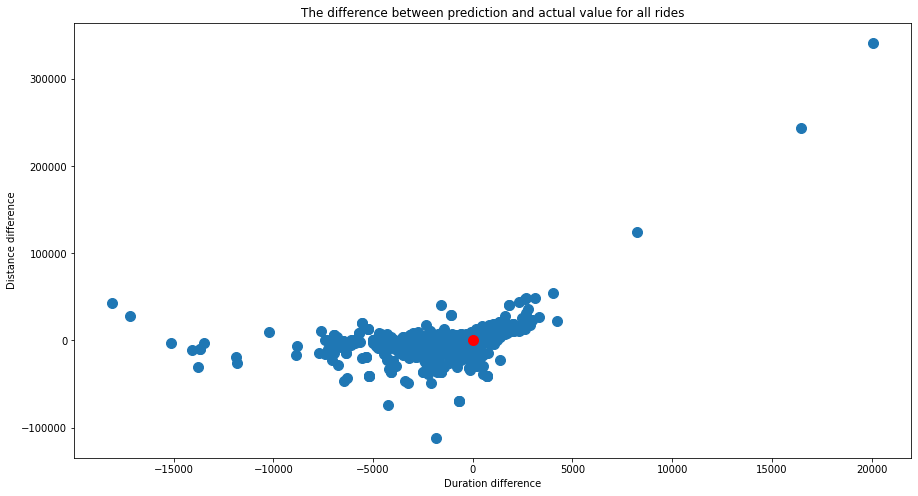

 99.37% of rides have problems with duration prediction
 96.22% of rides have problems with distance prediction
 63.59% of rides obtained final duration more than promised
 59.29% of rides obtained final distance more than promised


In [554]:
df4 = df[(df['overpaid_ride_ticket'] == 0)]
df5 = df4[['metered_price', 'upfront_price', 'distance', 'duration', 'predicted_distance', 'predicted_duration']]
df5.loc[:, 'change_duration'] = df5['predicted_duration'] - df5['duration']
df5.loc[:, 'change_distance'] = df5['predicted_distance'] - df5['distance']
x = np.array(df5['change_duration'])
y = np.array(df5['change_distance'])
plt.figure(figsize=(15,8))
plt.scatter(x, y, s=100)
plt.scatter(0, 0, s=100, color="red")
plt.xlabel("Duration difference")
plt.ylabel("Distance difference")
plt.title("The difference between prediction and actual value for all rides")
plt.show()
print(f"{df5[(df5['change_duration'] != 0)].change_duration.count() / df4.shape[0] * 100: .2f}% of rides have problems with duration prediction")
print(f"{df5[(df5['change_distance'] != 0)].change_distance.count() / df4.shape[0] * 100: .2f}% of rides have problems with distance prediction")
print(f"{df5[(df5['change_duration'] < 0)].change_duration.count() / df4.shape[0] * 100: .2f}% of rides obtained final duration more than promised")
print(f"{df5[(df5['change_distance'] < 0)].change_distance.count() / df4.shape[0] * 100: .2f}% of rides obtained final distance more than promised")



**Observation**

I checked and compared the difference between predicted distance and duration for all rides as for overpriced rides. It looks like our prediction model works not very well and could be improved. The model has a big scatter for duration in overpriced rides and smaller but still essential scatter for distance of overpriced rides. 

The picture looks better for all rides, but has notable problems with duration prediction anyway.

Also, I saw that almost 70% of problem rides have no upfront price. It means that in this case the user does not get the promised price and may report just because he has no price to compare.

This pushed me to the idea to check how many reports without troubles with gps/upfront price we have in not the EU.

In [580]:
print(str(df2[(df2['eu_indicator'] == 0) & (df2['gps_confidence'] == 0) & (df2["upfront_price"].isnull() == False) & (df2["upfront_price"] >= df2["metered_price"])].order_id_new.count()) + " rides have been reported but have no visible problems")


8 rides have been reported but have no visible problems


Definitely, we have 8 rides that had been reported as overpriced but had not the reason for this. I suppose that there are just mistakes or misclicks, but just in case it makes sense to check whether we have a problem with price policy in not EU countries.

## Insights and hypothesys 

* **96% of the problem rides happened in non EU regions** and it would be useful to get more specific details. Even though most overcharged rides have problems, **at least 8 of them have no obvious reasons to be reported** and I think we should validate the hypothesis about price policy in non EU region. 


* **Almost 60% overpriced rides have problems with gps** and this value is twice bigger than for all rides. Considering the previous point and **68% of raids that have problems with upfront price (most likely that means users do not get upfront price)** we can say that it relates things. Also, I detected splashes of the problem on some types of devices and app's versions. **I suggest conducting technical research** of these problems together with the engineering team. 


* Also, **I may suppose the prediction model is very noisy** as it has problems with distance prediction and even bigger problems with duration prediction. On graphs we can see that most cases have a negative difference between predicted and actual value. That means users get promised duration/distance less than actual after the ride. That may affect the user experience too. Probably, we should communicate with the ML team and discuss this theme. 